In [174]:
from dataset_readers import *
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import isnan
import scipy

from aif360.metrics import ClassificationMetric
from models import SimpleMLP
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import matthews_corrcoef as mcc

from xicorrelation import xicorr
from scipy.stats import spearmanr, pearsonr, kendalltau
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
sns.set_style('whitegrid')

In [175]:
datasets = [
    adult_dataset_reader,
    bank_dataset_reader,
    compas_dataset_reader,
    german_dataset_reader
]

In [176]:
def get_sorted_corr(dataset, correlation_function, target_feature_index):
    correlations = []
    target_feature = dataset[:, target_feature_index]

    for i in range(dataset.shape[1]):
        corr, _ = correlation_function(target_feature, dataset[:, i])
        if not isnan(corr):
            correlations.append(abs(corr))
    
    sorted_correlations = sorted(correlations, reverse=True)
    
    return sorted_correlations



In [177]:
dataset_info = []
datasets_names = ['Adult', 'Bank', 'Compas', 'German']
correlation_functions = [pearsonr, spearmanr, kendalltau, xicorr]
correlation_names = ['Pearson $\\rho$', 'Spearman $\\rho_s$', 'Kendall $\\tau$', 'Chatterjee $\\xi$']
for correlation_function, correlation_name in zip(correlation_functions, correlation_names):
    for dataset_reader, dataset_name in zip(datasets, datasets_names):
        dataset_expanded_train, dataset_train, dataset_val, dataset_test, unprivileged_groups, privileged_groups, sens_attr = dataset_reader(shuffle=False)
    
        sensitive_index = dataset_expanded_train.protected_attribute_names.index(sens_attr)
        print(dataset_name, correlation_name, sens_attr, sensitive_index)
        sorted_corrs = get_sorted_corr(
            np.vstack([dataset_expanded_train.features, dataset_test.features]) 
                          , correlation_function, sensitive_index)
        dataset_info.append({
            'correlation_function': correlation_name,
            'sorted_corrs': sorted_corrs,
            'dataset_name': dataset_name  # Nome do dataset, ajuste conforme necessário
        })
        

#### Training Dataset shape
(28941, 102)
#### Validation Dataset shape
(7236, 102)
#### Test Dataset shape
(9045, 102)
#### Favorable and unfavorable labels
1.0 0.0
#### Protected attribute names
['sex']
#### Privileged and unprivileged protected attribute values
[array([1.])] [array([0.])]
#### Dataset feature names
['age', 'education-num', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass=Federal-gov', 'workclass=Local-gov', 'workclass=Private', 'workclass=Self-emp-inc', 'workclass=Self-emp-not-inc', 'workclass=State-gov', 'workclass=Without-pay', 'education=10th', 'education=11th', 'education=12th', 'education=1st-4th', 'education=5th-6th', 'education=7th-8th', 'education=9th', 'education=Assoc-acdm', 'education=Assoc-voc', 'education=Bachelors', 'education=Doctorate', 'education=HS-grad', 'education=Masters', 'education=Preschool', 'education=Prof-school', 'education=Some-college', 'marital-status=Divorced', 'marital-status=Married-AF-spouse', 'marital-status=Marr

#### Training Dataset shape
(19512, 57)
#### Validation Dataset shape
(4878, 57)
#### Test Dataset shape
(6098, 57)
#### Favorable and unfavorable labels
1.0 0.0
#### Protected attribute names
['age']
#### Privileged and unprivileged protected attribute values
[array([1.])] [array([0.])]
#### Dataset feature names
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job=admin.', 'job=blue-collar', 'job=entrepreneur', 'job=housemaid', 'job=management', 'job=retired', 'job=self-employed', 'job=services', 'job=student', 'job=technician', 'job=unemployed', 'marital=divorced', 'marital=married', 'marital=single', 'education=basic.4y', 'education=basic.6y', 'education=basic.9y', 'education=high.school', 'education=illiterate', 'education=professional.course', 'education=university.degree', 'default=no', 'default=yes', 'housing=no', 'housing=yes', 'loan=no', 'loan=yes', 'contact=cellular', 'contact=telephone', 'mo

#### Training Dataset shape
(640, 58)
#### Validation Dataset shape
(160, 58)
#### Test Dataset shape
(200, 58)
#### Favorable and unfavorable labels
1.0 2.0
#### Protected attribute names
['sex', 'age']
#### Privileged and unprivileged protected attribute values
[array([1.]), array([1.])] [array([0.]), array([0.])]
#### Dataset feature names
['month', 'credit_amount', 'investment_as_income_percentage', 'residence_since', 'age', 'number_of_credits', 'people_liable_for', 'sex', 'status=A11', 'status=A12', 'status=A13', 'status=A14', 'credit_history=A30', 'credit_history=A31', 'credit_history=A32', 'credit_history=A33', 'credit_history=A34', 'purpose=A40', 'purpose=A41', 'purpose=A410', 'purpose=A42', 'purpose=A43', 'purpose=A44', 'purpose=A45', 'purpose=A46', 'purpose=A48', 'purpose=A49', 'savings=A61', 'savings=A62', 'savings=A63', 'savings=A64', 'savings=A65', 'employment=A71', 'employment=A72', 'employment=A73', 'employment=A74', 'employment=A75', 'other_debtors=A101', 'other_debtors

#### Training Dataset shape
(19512, 57)
#### Validation Dataset shape
(4878, 57)
#### Test Dataset shape
(6098, 57)
#### Favorable and unfavorable labels
1.0 0.0
#### Protected attribute names
['age']
#### Privileged and unprivileged protected attribute values
[array([1.])] [array([0.])]
#### Dataset feature names
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job=admin.', 'job=blue-collar', 'job=entrepreneur', 'job=housemaid', 'job=management', 'job=retired', 'job=self-employed', 'job=services', 'job=student', 'job=technician', 'job=unemployed', 'marital=divorced', 'marital=married', 'marital=single', 'education=basic.4y', 'education=basic.6y', 'education=basic.9y', 'education=high.school', 'education=illiterate', 'education=professional.course', 'education=university.degree', 'default=no', 'default=yes', 'housing=no', 'housing=yes', 'loan=no', 'loan=yes', 'contact=cellular', 'contact=telephone', 'mo

#### Training Dataset shape
(640, 58)
#### Validation Dataset shape
(160, 58)
#### Test Dataset shape
(200, 58)
#### Favorable and unfavorable labels
1.0 2.0
#### Protected attribute names
['sex', 'age']
#### Privileged and unprivileged protected attribute values
[array([1.]), array([1.])] [array([0.]), array([0.])]
#### Dataset feature names
['month', 'credit_amount', 'investment_as_income_percentage', 'residence_since', 'age', 'number_of_credits', 'people_liable_for', 'sex', 'status=A11', 'status=A12', 'status=A13', 'status=A14', 'credit_history=A30', 'credit_history=A31', 'credit_history=A32', 'credit_history=A33', 'credit_history=A34', 'purpose=A40', 'purpose=A41', 'purpose=A410', 'purpose=A42', 'purpose=A43', 'purpose=A44', 'purpose=A45', 'purpose=A46', 'purpose=A48', 'purpose=A49', 'savings=A61', 'savings=A62', 'savings=A63', 'savings=A64', 'savings=A65', 'employment=A71', 'employment=A72', 'employment=A73', 'employment=A74', 'employment=A75', 'other_debtors=A101', 'other_debtors

#### Training Dataset shape
(19512, 57)
#### Validation Dataset shape
(4878, 57)
#### Test Dataset shape
(6098, 57)
#### Favorable and unfavorable labels
1.0 0.0
#### Protected attribute names
['age']
#### Privileged and unprivileged protected attribute values
[array([1.])] [array([0.])]
#### Dataset feature names
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job=admin.', 'job=blue-collar', 'job=entrepreneur', 'job=housemaid', 'job=management', 'job=retired', 'job=self-employed', 'job=services', 'job=student', 'job=technician', 'job=unemployed', 'marital=divorced', 'marital=married', 'marital=single', 'education=basic.4y', 'education=basic.6y', 'education=basic.9y', 'education=high.school', 'education=illiterate', 'education=professional.course', 'education=university.degree', 'default=no', 'default=yes', 'housing=no', 'housing=yes', 'loan=no', 'loan=yes', 'contact=cellular', 'contact=telephone', 'mo

#### Training Dataset shape
(640, 58)
#### Validation Dataset shape
(160, 58)
#### Test Dataset shape
(200, 58)
#### Favorable and unfavorable labels
1.0 2.0
#### Protected attribute names
['sex', 'age']
#### Privileged and unprivileged protected attribute values
[array([1.]), array([1.])] [array([0.]), array([0.])]
#### Dataset feature names
['month', 'credit_amount', 'investment_as_income_percentage', 'residence_since', 'age', 'number_of_credits', 'people_liable_for', 'sex', 'status=A11', 'status=A12', 'status=A13', 'status=A14', 'credit_history=A30', 'credit_history=A31', 'credit_history=A32', 'credit_history=A33', 'credit_history=A34', 'purpose=A40', 'purpose=A41', 'purpose=A410', 'purpose=A42', 'purpose=A43', 'purpose=A44', 'purpose=A45', 'purpose=A46', 'purpose=A48', 'purpose=A49', 'savings=A61', 'savings=A62', 'savings=A63', 'savings=A64', 'savings=A65', 'employment=A71', 'employment=A72', 'employment=A73', 'employment=A74', 'employment=A75', 'other_debtors=A101', 'other_debtors

#### Training Dataset shape
(19512, 57)
#### Validation Dataset shape
(4878, 57)
#### Test Dataset shape
(6098, 57)
#### Favorable and unfavorable labels
1.0 0.0
#### Protected attribute names
['age']
#### Privileged and unprivileged protected attribute values
[array([1.])] [array([0.])]
#### Dataset feature names
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job=admin.', 'job=blue-collar', 'job=entrepreneur', 'job=housemaid', 'job=management', 'job=retired', 'job=self-employed', 'job=services', 'job=student', 'job=technician', 'job=unemployed', 'marital=divorced', 'marital=married', 'marital=single', 'education=basic.4y', 'education=basic.6y', 'education=basic.9y', 'education=high.school', 'education=illiterate', 'education=professional.course', 'education=university.degree', 'default=no', 'default=yes', 'housing=no', 'housing=yes', 'loan=no', 'loan=yes', 'contact=cellular', 'contact=telephone', 'mo

#### Training Dataset shape
(3946, 401)
#### Validation Dataset shape
(987, 401)
#### Test Dataset shape
(1234, 401)
#### Favorable and unfavorable labels
0.0 1.0
#### Protected attribute names
['sex', 'race']
#### Privileged and unprivileged protected attribute values
[array([1.]), array([1.])] [array([0.]), array([0.])]
#### Dataset feature names
['sex', 'age', 'race', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'age_cat=25 - 45', 'age_cat=Greater than 45', 'age_cat=Less than 25', 'c_charge_degree=F', 'c_charge_degree=M', 'c_charge_desc=Abuse Without Great Harm', 'c_charge_desc=Agg Abuse Elderlly/Disabled Adult', 'c_charge_desc=Agg Assault W/int Com Fel Dome', 'c_charge_desc=Agg Battery Grt/Bod/Harm', 'c_charge_desc=Agg Fleeing and Eluding', 'c_charge_desc=Agg Fleeing/Eluding High Speed', 'c_charge_desc=Aggr Child Abuse-Torture,Punish', 'c_charge_desc=Aggrav Battery w/Deadly Weapon', 'c_charge_desc=Aggrav Child Abuse-Agg Battery', 'c_charge_desc=Aggrav Child

In [178]:
def set_x_limits(ax, xlim, color=None, **kwargs):
    if xlim == '1-10':
        ax.set_xlim(1, 10)
    elif xlim == '1-400':
        ax.set_xlim(1, 400)

In [179]:
plot_data = []
for info in dataset_info:
    for index, corr in enumerate(info['sorted_corrs']):
        plot_data.append({
            'correlation_function': info['correlation_function'],
            'feature_index': index,
            'correlation_value': corr,
            'dataset_name': info['dataset_name'],
            'xlim': '1-10'
        })
        plot_data.append({
            'correlation_function': info['correlation_function'],
            'feature_index': index,
            'correlation_value': corr,
            'dataset_name': info['dataset_name'],
            'xlim': '1-400'
        })

plot_df = pd.DataFrame(plot_data)

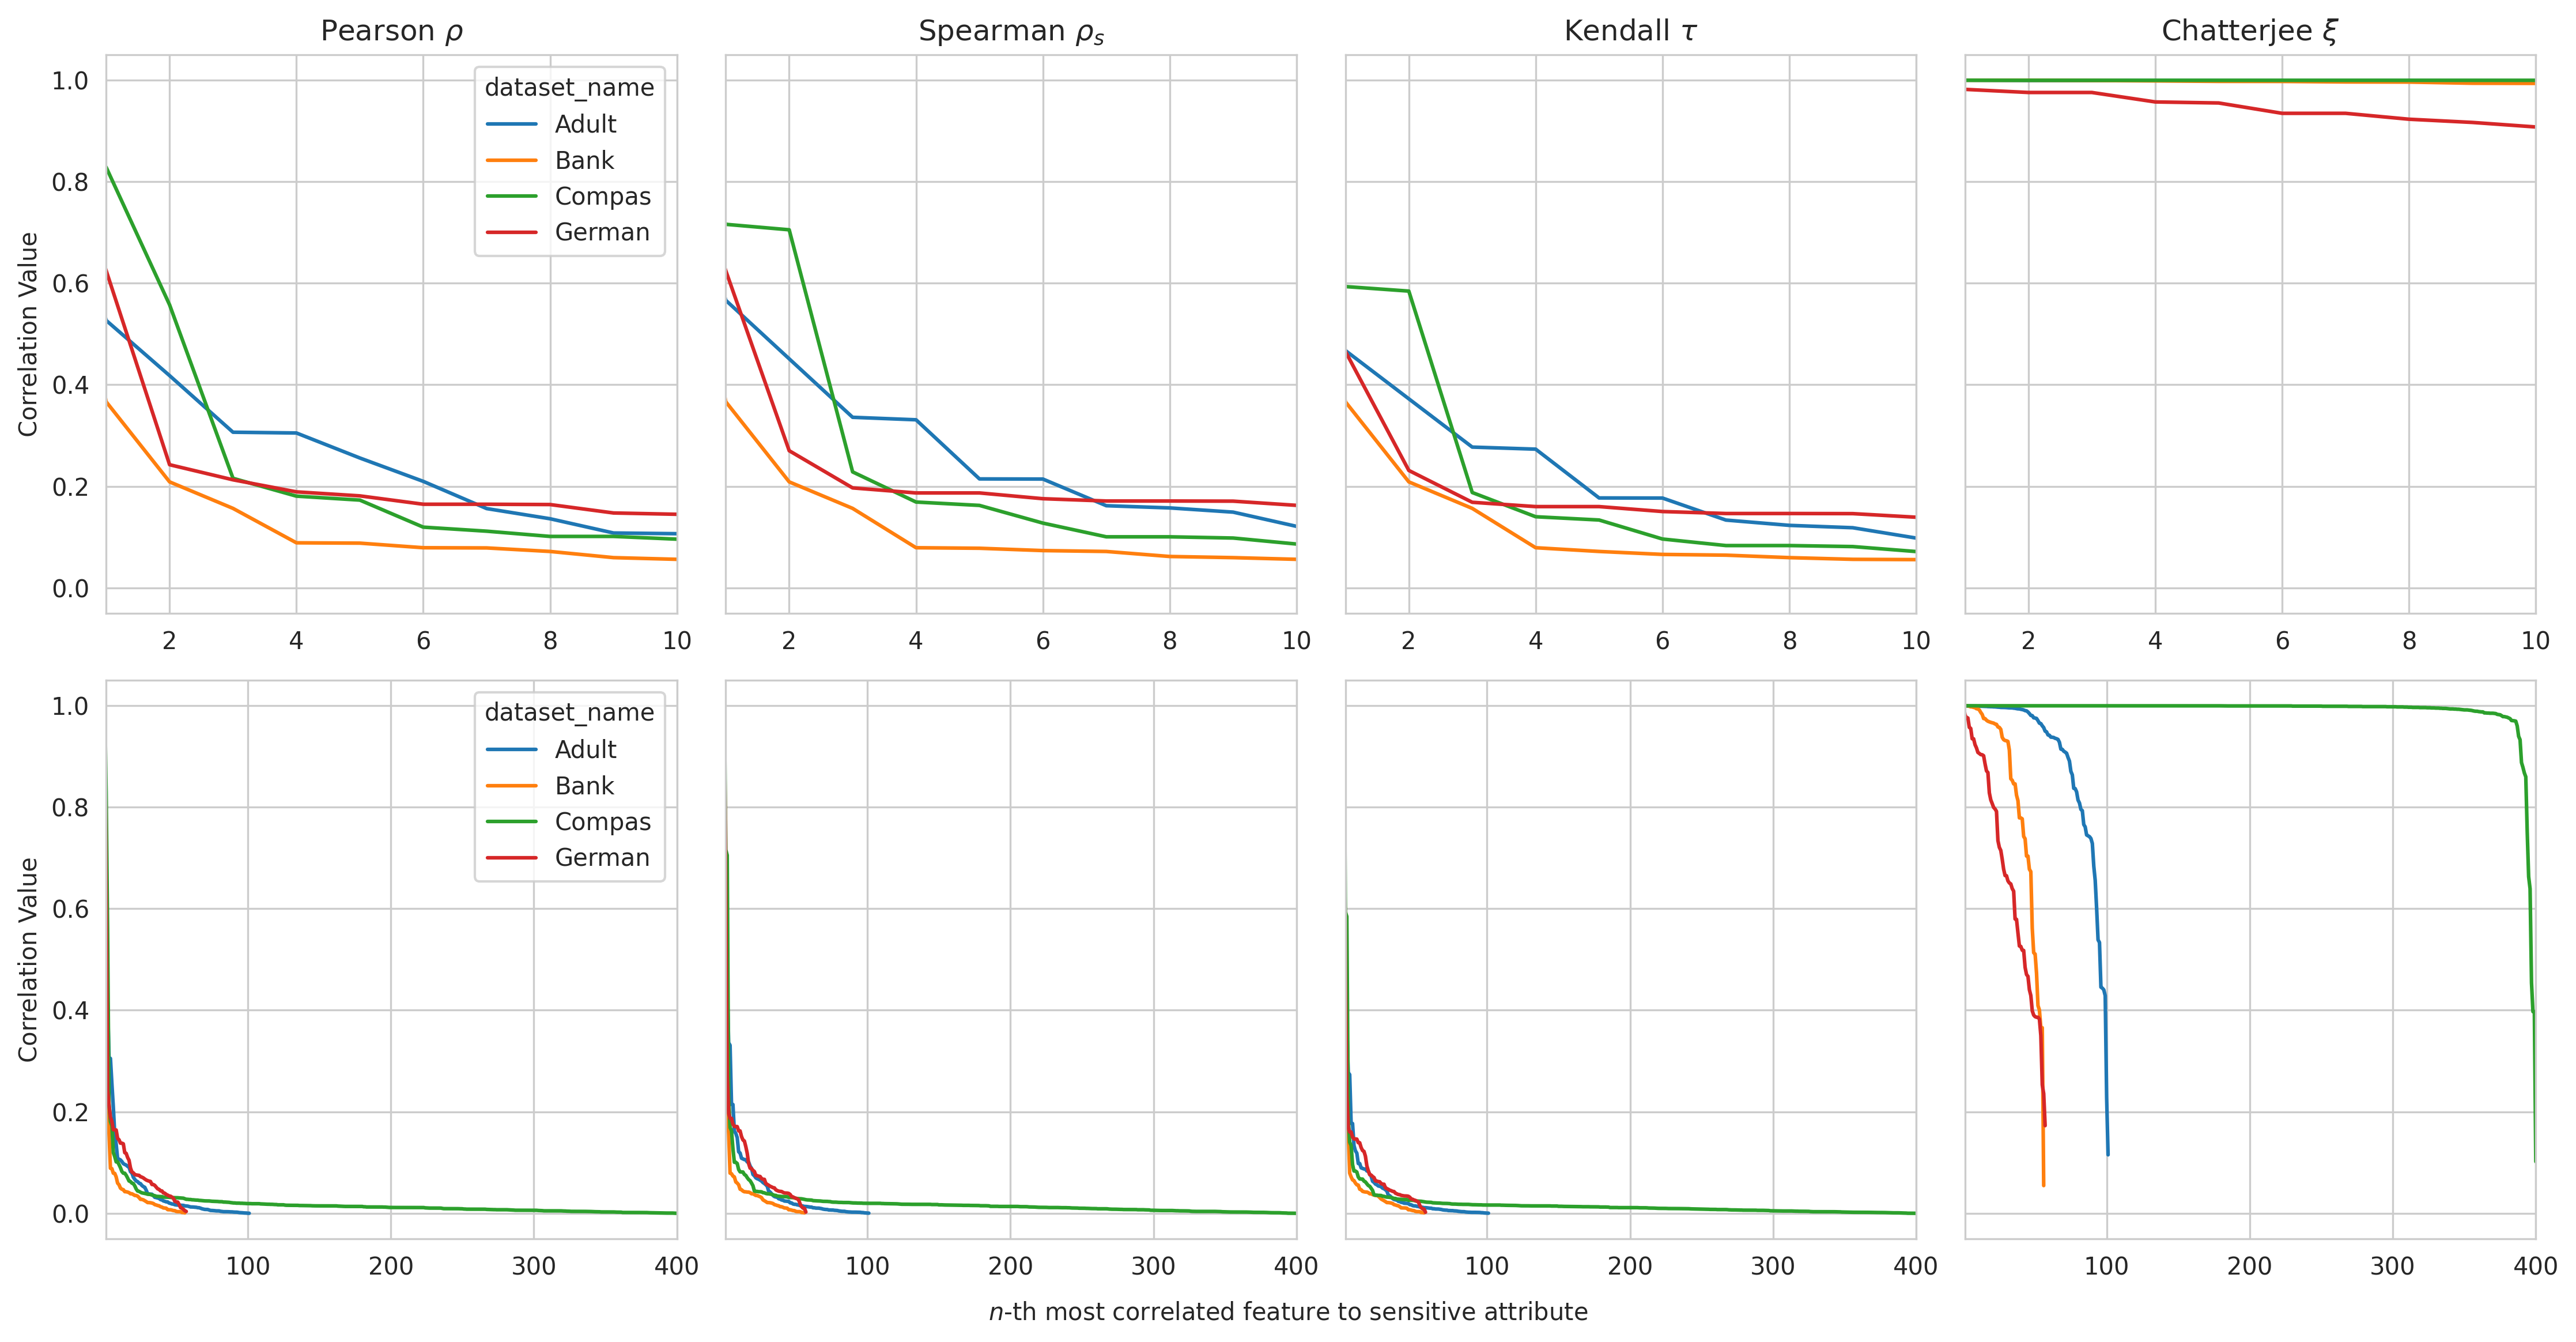

In [190]:

fig, axes = plt.subplots(2, 4, figsize=(15, 8), sharey='row', sharex='row')

correlation_names = ['Pearson $\\rho$', 'Spearman $\\rho_s$', 'Kendall $\\tau$', 'Chatterjee $\\xi$']
xlims = ['1-10', '1-400']
for i, xlim in enumerate(xlims):
    for j, correlation_name in enumerate(correlation_names):
        ax = axes[i, j]
        subset = plot_df[(plot_df['correlation_function'] == correlation_name) & (plot_df['xlim'] == xlim)]
        sns.lineplot(data=subset, x='feature_index', y='correlation_value', hue='dataset_name', ax=ax)
        
        ax.set_xlim(1, 10 if xlim == '1-10' else 400)
        
        ax.set_ylabel('Correlation Value')
        
        if i == 0:
            ax.set_xlabel('')
            ax.set_title(f'{correlation_name}')
        else:
            ax.set_xlabel('')
            ax.set_title('')
        if j != 0:
            ax.legend_.remove()

fig.text(0.5, 0.04, r'$n$-th most correlated feature to sensitive attribute', ha='center')

plt.tight_layout(rect=[0, 0.05, 1, 1])  # Ajusta o layout para evitar sobreposição com o xlabel
plt.savefig('plots/dataset_correlation_plots.png')
plt.savefig('plots/dataset_correlation_plots.pdf')
plt.show()
